In [11]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import pandas as pd

boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)



In [20]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [21]:
boston
xtrain
#pd1 = pd.DataFrame(y)
#pd1

array([[1.27440e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.85410e+02, 4.84000e+00],
       [2.89900e-02, 4.00000e+01, 1.25000e+00, ..., 1.97000e+01,
        3.89850e+02, 5.89000e+00],
       [4.68400e-02, 0.00000e+00, 3.41000e+00, ..., 1.78000e+01,
        3.92180e+02, 8.81000e+00],
       ...,
       [4.02020e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.95210e+02, 1.03600e+01],
       [1.14250e-01, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.93740e+02, 1.05000e+01],
       [3.32105e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.96900e+02, 2.68200e+01]])

In [2]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(xtrain, ytrain)
 


XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [5]:
score = xgbr.score(xtrain, ytrain)   
print("Training score: ", score) 
 


Training score:  0.9999938346955701


In [6]:
# - cross validataion 
scores = cross_val_score(xgbr, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.87


In [7]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.86


In [8]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))


MSE: 10.30
RMSE: 3.21


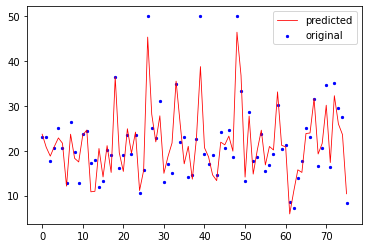

In [9]:
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()